<a href="https://www.kaggle.com/code/karahanos/example-notebook?scriptVersionId=203093972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Trade Analyst Example 

## Import Libs

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


### Import Data

In [9]:
df = pd.read_csv('/kaggle/input/trade-analyst-example-date-set/messy_trading_data.csv', parse_dates= True )

### Let's see what we have

In [10]:
df.head()

,Date,Price,Volume,Temperature,Day_Type
0,2022-01-01,52.483571,196.942732,22.980721,Weekend
1,2022-01-02,49.756010,189.759896,21.256343,Weekend
2,2022-01-03,54.133055,199.614946,22.324721,Weekday
3,2022-01-04,58.956939,225.802920,20.594690,Weekday
4,2022-01-05,50.618046,192.816402,19.400500,Weekday


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         367 non-null    object 
 1   Price        367 non-null    float64
 2   Volume       367 non-null    float64
 3   Temperature  362 non-null    float64
 4   Day_Type     367 non-null    object 
dtypes: float64(3), object(2)
memory usage: 14.5+ KB


In [12]:
print(df['Date'].max(),df['Date'].min())

2022-12-31 2022-01-01


In [13]:
df['Temperature'].isnull().sum()

5

In [14]:
duplicates = df[df['Date'].duplicated()]

print(duplicates)

           Date      Price        Volume  Temperature               Day_Type
99   2022-04-09  86.875733  10000.000000    21.077154                WhoAmI?
129  2022-05-08  90.189182    269.887959    21.737639  WhyIsDataAlwaysMessy?


In [15]:
df = df.drop([99,129])
df['Day_Type'].unique()

array(['Weekend', 'Weekday', 'Holiday'], dtype=object)

As we see,
- 'Temperature' column has 5 null row.
- Converting the Date column to date-time object would enhence our analysis:
    - We could use it as our index column. 
    - We could create some other featues like month, quarter of the year or half of the year to observe seasonality.         
- Since dataset contains one year interval, having 367 rows is not consistened. 2022-04-09 and 2022-05-08 dates have duplicates.
- After dropping duplicates non-sense Day_Type values disappeared with them.    

In [16]:
df[df['Temperature'].isnull()].index

Index([95, 141, 181, 257, 272], dtype='int64')

In [17]:
meanOfTemp = df['Temperature'].mean()
df['Temperature'] =df['Temperature'].fillna(value= meanOfTemp)

In [18]:
df['Date'] = pd.to_datetime(df['Date']) # Date converted to date-time object


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 366
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Price        365 non-null    float64       
 2   Volume       365 non-null    float64       
 3   Temperature  365 non-null    float64       
 4   Day_Type     365 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 17.1+ KB


## EDA

### Feature Creation

In order to see trends, we could create features like month, quarter of the year.

In [20]:
df['month'], df['quarter'], df['numOfDay'] = df['Date'].dt.month, df['Date'].dt.quarter, df['Date'].dt.day_of_year

In [21]:
df

,Date,Price,Volume,Temperature,Day_Type,month,quarter,numOfDay
0,2022-01-01,52.483571,196.942732,22.980721,Weekend,1,1,1
1,2022-01-02,49.756010,189.759896,21.256343,Weekend,1,1,2
2,2022-01-03,54.133055,199.614946,22.324721,Weekday,1,1,3
3,2022-01-04,58.956939,225.802920,20.594690,Weekday,1,1,4
4,2022-01-05,50.618046,192.816402,19.400500,Weekday,1,1,5
...,...,...,...,...,...,...,...,...
362,2022-12-27,150.807920,407.196271,14.422706,Weekday,12,4,361
363,2022-12-28,156.321905,424.801741,19.671611,Weekday,12,4,362
364,2022-12-29,148.561587,400.855357,17.365874,Weekday,12,4,363
365,2022-12-30,151.561227,394.193782,19.872203,Weekday,12,4,364


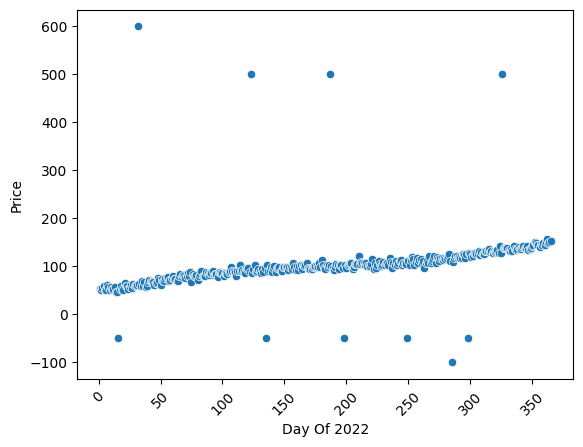

In [22]:
sns.scatterplot(data= df ,x='numOfDay', y='Price')
plt.xlabel('Day Of 2022')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

As we see on the graph above, we have some irregularities (outliers) on price date. In addition to that the data contains neagative price values which is not possible. 

In [23]:
upper_cap = df['Price'].quantile(0.95)
lower_cap = df['Price'].quantile(0.05)

# Cap the outliers
df['Price'] = df['Price'].clip(lower=lower_cap, upper=upper_cap)


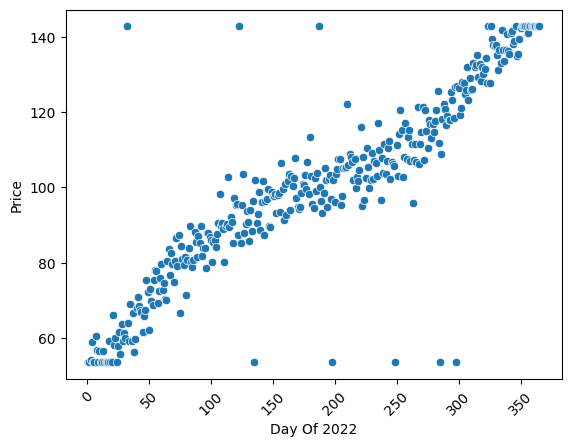

In [24]:
sns.scatterplot(data= df ,x='numOfDay', y='Price')
plt.xlabel('Day Of 2022')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

As we see on the graph above, price data has risen by double over time.

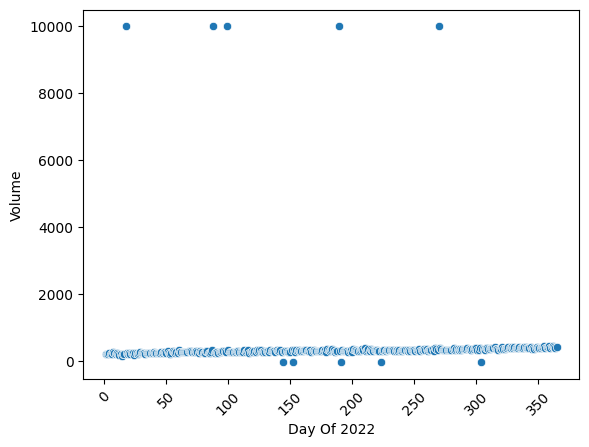

In [25]:
sns.scatterplot(data= df ,x='numOfDay', y='Volume')
plt.xlabel('Day Of 2022')
plt.ylabel('Volume')
plt.xticks(rotation = 45)
plt.show()

Similiar to what we see on Price/Day graph, we have outliers here too! This graph unfortunately tells nothing.

In [26]:
upper_cap = df['Volume'].quantile(0.95)
lower_cap = df['Volume'].quantile(0.05)

# Cap the outliers
df['Volume'] = df['Volume'].clip(lower=lower_cap, upper=upper_cap)


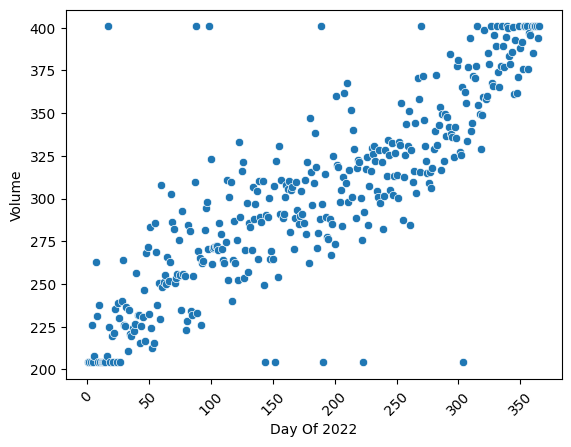

In [27]:
sns.scatterplot(data= df ,x='numOfDay', y='Volume')
plt.xlabel('Day Of 2022')
plt.ylabel('Volume')
plt.xticks(rotation = 45)
plt.show()

According to the Volume/Day graph, Volume data has risen double over time. 

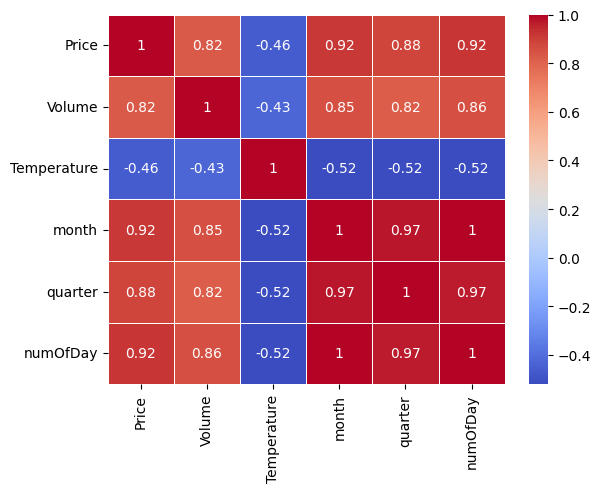

In [28]:
corr_matrix = df.select_dtypes(include=('int', 'float'))

sns.heatmap(data= corr_matrix.corr(method='spearman'), annot= True, cmap='coolwarm', linewidths=0.5)
plt.show()

From the grap we can say that the Price has moderately and negative correlation with Temperature. However rest of the features has strong and positive correlation.

## Time-Series Anaylsis with FB Prophet

In [29]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


### Train - Split Data


In [30]:
holidays = df[df['Day_Type']=='Holiday'] # 'holidays' feature is created to investigate whether it has a impact on prices

df.set_index('Date', inplace=True) # Date has set as index of DataFrame

split_index = 365 * 0.8 # index of split

In [31]:
holidays = holidays.drop(columns=['Price','Volume','quarter','month','numOfDay', 'Temperature']) # Unnecessary are columns dropped
holiday = holidays.rename(columns={'Date': 'ds', 'Day_Type': 'holiday'}) # Columns are renamed 

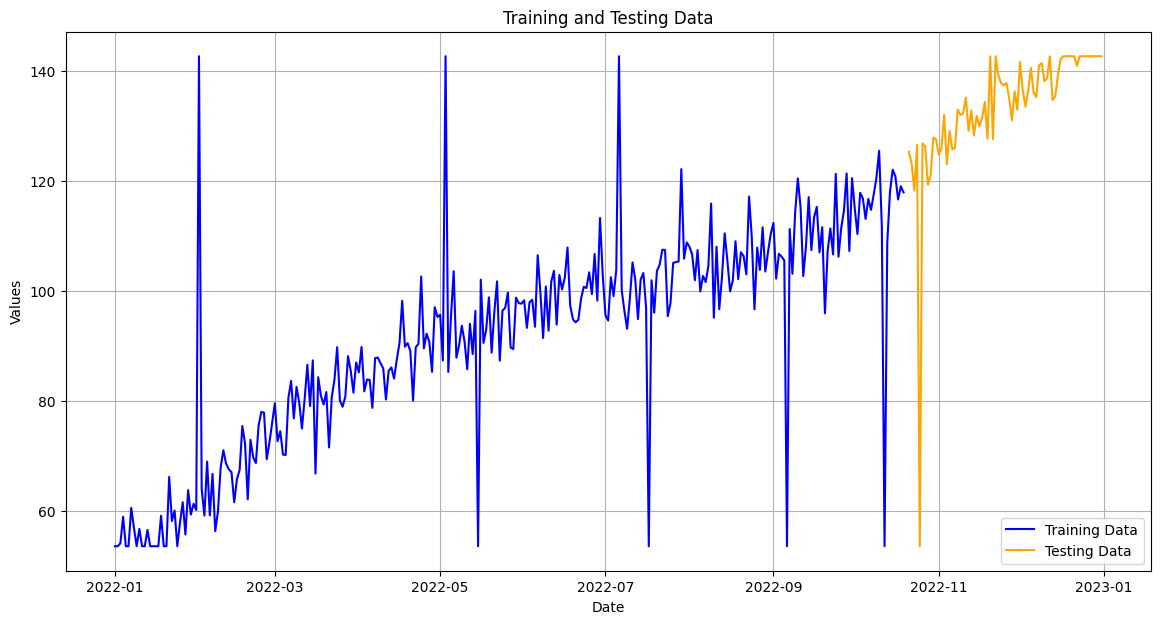

In [32]:
split = df.index[int(split_index)]

train = df[df.index < split].copy()
test = df[df.index > split].copy()
# Splitting is completed

# Plotting
plt.figure(figsize=(14, 7))  # Set the size of the plot
plt.plot(train.index, train['Price'], label='Training Data', color='blue')
plt.plot(test.index, test['Price'], label='Testing Data', color='orange')

# Adding titles and labels
plt.title('Training and Testing Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()  # Show the legend
plt.grid()    # Add a grid for better readability
plt.show()    # Display the plot

In [33]:
train_prophet = train.reset_index() \
    .rename(columns={'Date' : 'ds',
                     'Price': 'y'})
# Columns are renamed according to the model needs

In [34]:
model = Prophet(holidays=holiday)
model.fit(train_prophet) # Model is trained

13:01:29 - cmdstanpy - INFO - Chain [1] start processing
13:01:30 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
test_prophet = test.reset_index() \
    .rename(columns={'Date' : 'ds',
                     'Price': 'y'})
# Columns are renamed according to model needs

test_frcst = model.predict(test_prophet) # Predictions is made

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


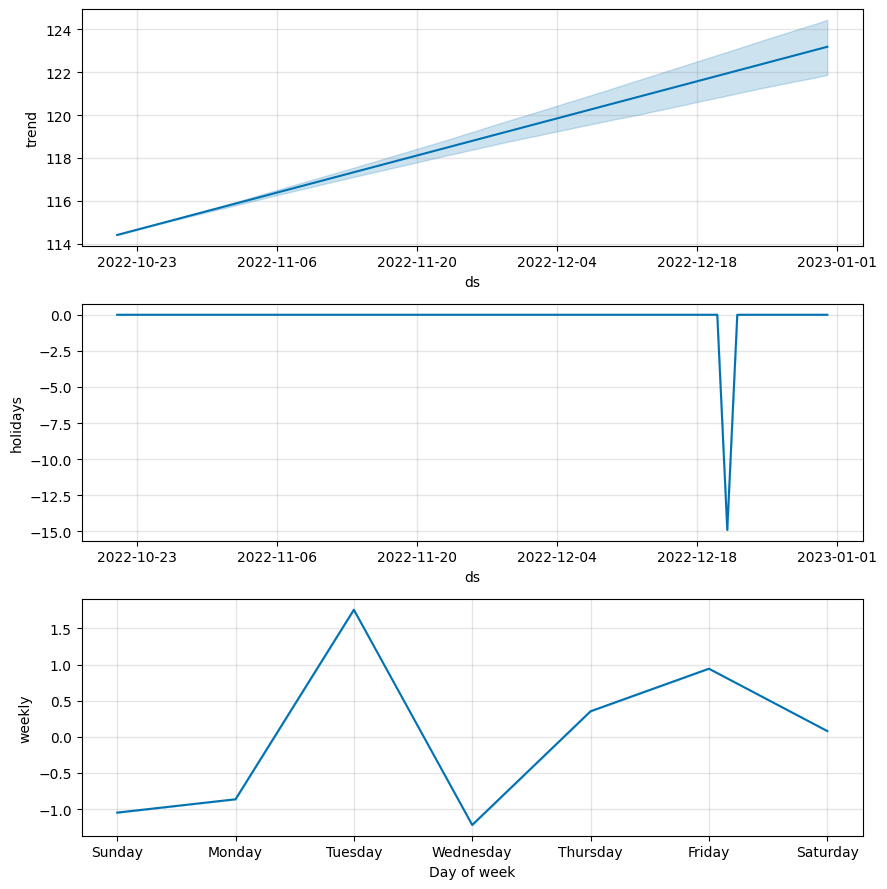

In [36]:
fig = model.plot_components(test_frcst) # type: ignore
plt.show() 

- According to graph, Price data has upward trend through out the year
- Holidays do not affect Price data
- There is a consistent weekly pattern base on the days of the week. 

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


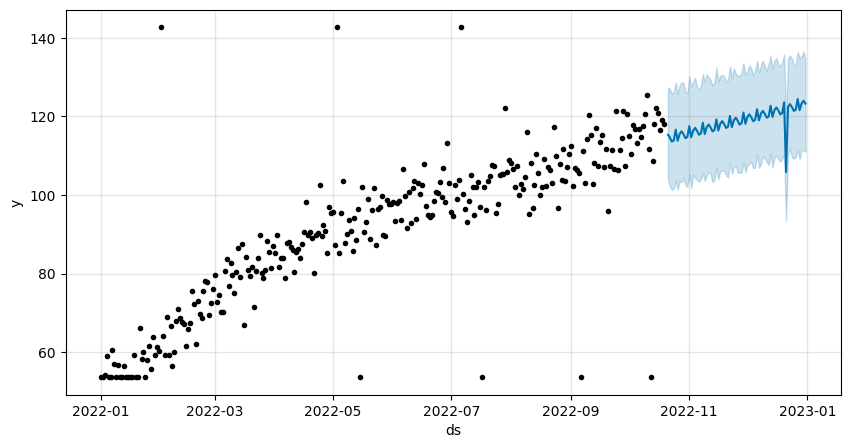

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(test_frcst, ax=ax)
plt.show()

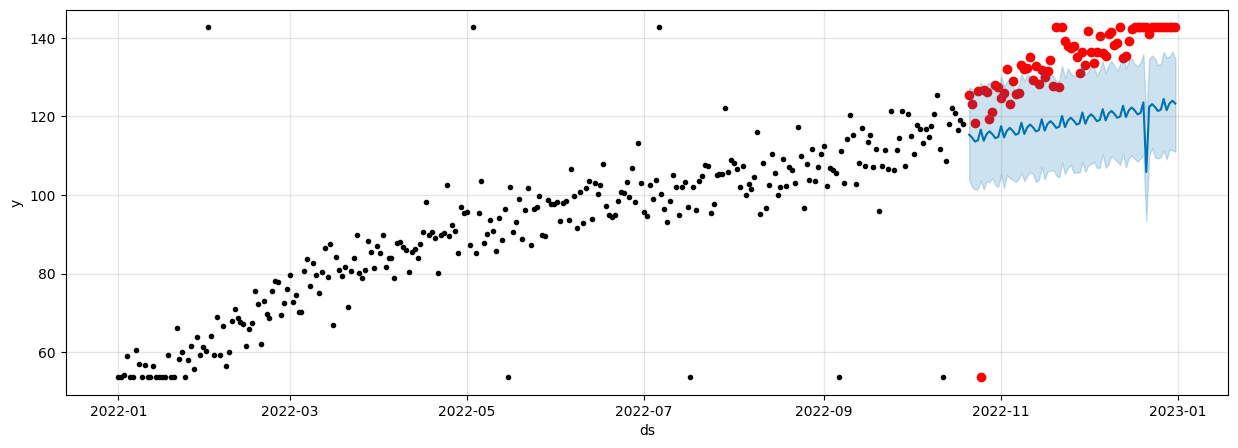

In [38]:
f, ax = plt.subplots(figsize= (15,5))

ax.scatter(test.index, test['Price'], color= 'red')
fig = model.plot(test_frcst, ax=ax)
plt.show()

As date goes on, the actual data falls outside confidence interval, so alternative models like XGBoost might provide more accurate predictions.

## Evaluation

In [39]:
rmse = np.sqrt(mean_squared_error(y_true= test_prophet['y'], y_pred=test_frcst['yhat']))
print(f'Root Mean Squared Error: {rmse:f}')

Root Mean Squared Error: 18.374352


In [40]:
mae = mean_absolute_error(y_true= test_prophet['y'], y_pred=test_frcst['yhat'])
print(f'Mean Absolute Error: {mae:f}')

Mean Absolute Error: 16.689515


In [41]:
mape =mean_absolute_percentage_error(y_true= test_prophet['y'], y_pred=test_frcst['yhat'])
print(f'Mean Absolute Percentage Error: {100 * mape:.2f}%')

Mean Absolute Percentage Error: 13.22%
